<a href="https://colab.research.google.com/github/callecristina/callecristina/blob/main/Pactia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Pronostico de ventas**

# **Carga de datos**
En primera instancia se procede a determinar el ordenamiento de los datos Se crea las variables:  día_semana y el día_mes, y trimestre.

Se observa que las categorías: Moda infantil, Tecnología y Otros, se encuentran 
incompletass. La categoría hogar también presenta datos faltantes. Sin embargo base de datos de entrenamiento es una muestra balanceada en cuanto a las categorías.

En cuanto a las variables externas el ipc no se utilizó debido a que esta discriminado por ciudades y obtener el nivel nacional requería un análisis adicional o consultarlo de una fuente adicional.
Se adicionaron las variables trm y tasa de empleo y tasa de desempleo, tanto al archivo de entrenamiento como el de prueba.


In [2]:
#Datos de entrenamiento
import pandas as pd
df = pd.read_excel('train.xlsx', sheet_name='Sheet1')
df.head()

,fecha,mes,año,año_mes,trimestre,dia_semana,dia_mes,trafico_dia,categoria,venta_diaria,area_total_ocupada,empleo,desempleo,trm
0,2019-01-01,1,2019,20191,1,2,1,4481.0,COMIDAS Y BARES,3.487444e+07,721.903,55.333559,12.795458,3249.75
1,2019-01-01,1,2019,20191,1,2,1,4481.0,ENTRETENIMIENTO,4.204079e+06,1883.453,55.333559,12.795458,3249.75
2,2019-01-01,1,2019,20191,1,2,1,4481.0,HIPERMERCADO,2.318765e+07,6225.960,55.333559,12.795458,3249.75
3,2019-01-01,1,2019,20191,1,2,1,4481.0,HOGAR,3.491659e+04,104.078,55.333559,12.795458,3249.75
4,2019-01-01,1,2019,20191,1,2,1,4481.0,MODA Y CALZADO,9.370870e+06,2399.566,55.333559,12.795458,3249.75


In [3]:
#Datos de texteo
df2=pd.read_excel("test.xlsx", sheet_name="Hoja1")
df2.head()

,fecha,mes,año,año_mes,trimestre,dia_semana,día_mes,trafico_dia,categoria,venta_diaria,area_total_ocupada,empleo,desempleo,trm
0,2021-03-01,3,2021,20213,1,1,1,9288.0,COMIDAS Y BARES,2.643084e+07,855.959,51.733218,14.180513,3624.39
1,2021-03-01,3,2021,20213,1,1,1,9288.0,ENTRETENIMIENTO,6.239684e+06,3673.280,51.733218,14.180513,3624.39
2,2021-03-01,3,2021,20213,1,1,1,9288.0,HIPERMERCADO,7.603325e+07,6225.960,51.733218,14.180513,3624.39
3,2021-03-01,3,2021,20213,1,1,1,9288.0,HOGAR,4.065506e+06,156.104,51.733218,14.180513,3624.39
4,2021-03-01,3,2021,20213,1,1,1,9288.0,MODA INFANTIL,3.457792e+05,53.781,51.733218,14.180513,3624.39


# **Análisis exploratorio**
Este análisis busca explorar diferentes hipotesis sobre los datos.
**Las gráficas pueden ser observadas mejor en un entorno de programación como spyder**

*Gráfica del nivel de ventas por categoría*

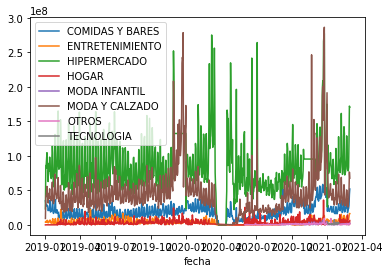

In [4]:
import matplotlib.pyplot as plt
grupos=df.groupby("categoria")
fig, ax=plt.subplots()
for name,group in grupos:
    ax.plot(group.fecha,group.venta_diaria, label=name)
    ax.set_xlabel("fecha")    
ax.legend()

Se gráfica las ventas diarias por categoría, y se puede observar que la categoría con mayor nivel de ventas es la categoría de hipermercado.

También se observar que para el periodo de abril del 2020, hubo una caída en las ventas abruptas en todas las categorías, o hubo problemas en la recolección de los datos. 

Adicionalmente se observa que en el período de tiempo entre diciembre y enero hay picos en la categoría de moda y calzado, esto se puede deber a las compras dicembrinas

*Histograma ventas*

Text(0.5, 0, 'ventas')

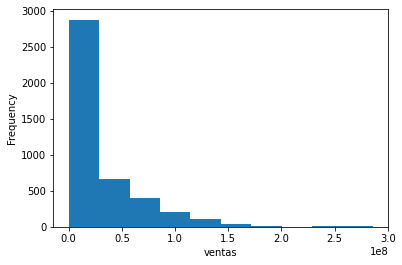

In [5]:
df.venta_diaria.plot.hist().set_xlabel("ventas")

El histograma de la variable venta_diaria parece tener una distribución gama, por su asimetría positiva.

*Histograma ventas por categoría*

Text(0.5, 0, 'ventas')

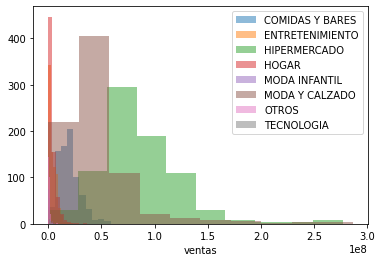

In [6]:
grupos=df.groupby("categoria")
fig, ax=plt.subplots()
for name,group in grupos:
    ax.hist(group.venta_diaria, label=name, ls="dotted", alpha=0.5, lw=3)
ax.legend()
ax.set_xlabel("ventas")


Si se grafica el histograma por categoría. 
Se observa que el sector hipermercados y moda y calzado tienen una distribución similar a la normal, además que tienen mayores niveles de ventas, lo mismo que el sector de tecnología.


*Correlación entre las variables continuas*

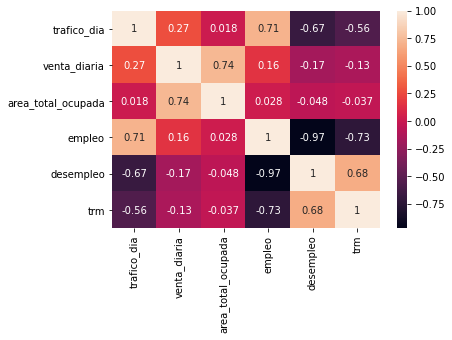

In [7]:
import seaborn as sns
dfc=df.iloc[:,7:]
#data frame con las variables continuas
covarianza=dfc.cov() #matriz de covarianza
correlation=dfc.corr()#matriz de correlación
sns.heatmap(correlation, annot = True)#mapa de calor

Se calcula la matriz de correlaciones de Pearson y se observa que la variable ventas diarias esta correlacionada positivamente con el tráfico, y en una mayor medida con el área total ocupada.

Además la variable objetivo está relacionada positivamente con el empleo, pero a un nivel muy bajo.
En cambio la correlacion de las ventas con el desempleo y la tasa de cambio, es negativa pero también muy baja.

*Gráficos de dispersión*

Text(0.5, 0, 'trafico')

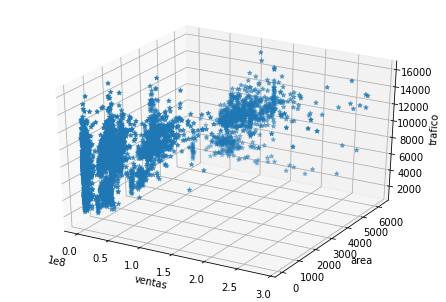

In [8]:
from matplotlib import pyplot    
from mpl_toolkits.mplot3d import Axes3D
grafica = pyplot.figure()
ax = Axes3D(grafica)
ax.scatter3D(df.venta_diaria,df.area_total_ocupada,df.trafico_dia, marker="*")
ax.set_xlabel("ventas")
ax.set_ylabel("area")
ax.set_zlabel("trafico")             

Esta gráfica muestra la relación positiva que existe entre área, tráfico y la venta. Sugiere que pueden existir dos grupos diferenciados por el área. Uno con menores áreas y menores ventas y otro con mayores áreas y mayores ventas. Sería interesante determinar si esta diferenciación se cumple para ciertas categoría en espacial, como un análisis futuro

Dada que la correlación más fuerte que tiene la variable de ventas diarias es con el área total ocupada, se realiza entonces un gráfico de dispersión de las ventas vrs área ocupada

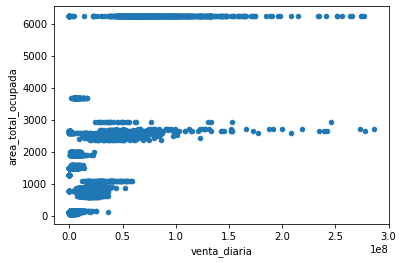

In [9]:
df.plot.scatter(x="venta_diaria",y="area_total_ocupada") #grafico de dispersión ventas vrs área

Se observa que hay grupos que estan claramente diferenciados por el área total ocupada. Para entender mejor este fenomeno entonces se grafica las ventas agrupado por categoría para determinar si existe un patrón.

Text(0, 0.5, 'area')

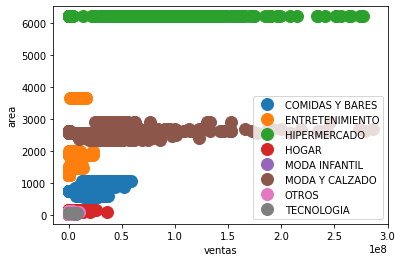

In [10]:
grupos=df.groupby("categoria")
fig, ax=plt.subplots()
ax.margins(0.05)
for name, group in grupos:
    ax.plot(group.venta_diaria, group.area_total_ocupada, marker="o", linestyle="", ms=12,label=name)
ax.legend()
ax.set_xlabel("ventas")
ax.set_ylabel("area")

Se comprueba que hay un comportamiento diferenciado por categorías, donde se observa que el sector hipermercado es que presenta una mayor área ocupada para cualquier nivel de ventas. En general las categorías presentan niveles de ocupacion por venta estable, excepto en el sector de entretenimento, donde es posible que se haya presenado algún grado de desocupación, pero eso es una hipotesis que habría que análisar en un futuro

Se analiza el gráfico de dispersión de las demás variables continúas con respecto a la variable objetivo

*ventas vrs tráfico*

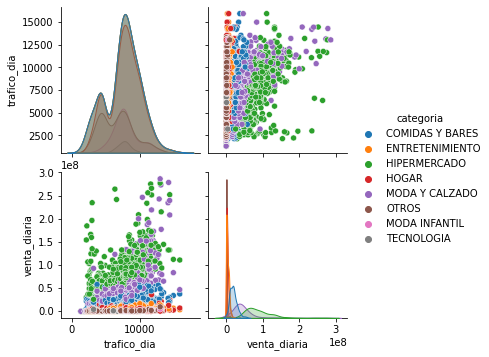

In [11]:
grupos=df.groupby("categoria")
sns.pairplot(df, hue="categoria", vars=["trafico_dia","venta_diaria"])

Se observa que, si bien, existe una relación positiva entre el tráfico y las ventas, esta relación esta diferenciada por la categoría, siendo más preponderante en hipermercado, moda y calzado y comida y bares.

 *ventas vrs área *ocupada**

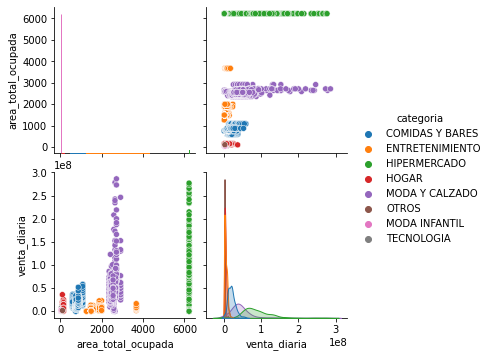

In [12]:
grupos=df.groupby("categoria")
sns.pairplot(df, hue="categoria", vars=["area_total_ocupada","venta_diaria"])

En cuanto al área total ocupada, la diferenciación entre categorías es más pronuncida, pero este se puede a deber a que la ocupación es una variable relativa estable. Se observa que los sectores de hipermercado tien una gran variación de las ventas para la mayor área ocupada

*ventas vrs desempleo*

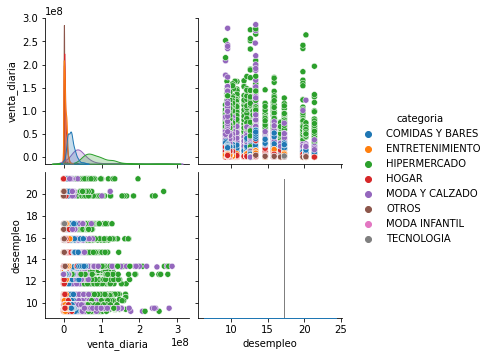

In [13]:
grupos=df.groupby("categoria")
df = pd.read_excel('train.xlsx', sheet_name='Sheet1')
sns.pairplot(df, hue="categoria", vars=["venta_diaria","desempleo"])

De la anterior gráfica no se puede observar que el desempleo afecte particularmente a una categoría, pero se podría ver que el sector de hipermercado es el que mayor niveles de ventas presenta en los niveles más altos de desempleo, sugiriendo que es un sector más inelástico frente a cambios en el desempleo.

*ventas vrs trm*

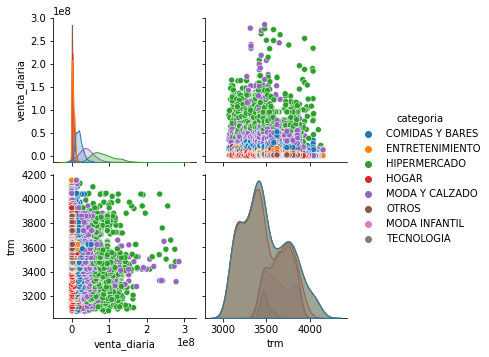

In [14]:
grupos=df.groupby("categoria")
sns.pairplot(df, hue="categoria", vars=["venta_diaria","trm"])

De la anterior gáfica no se puede observar que existe un efecto de la trm en un sector particular, sin embargo se observa que el sector hipermercado mantiene mayores niveles de ventas para tipos de cambio altos, sugiriendo que es un sector más inelástico. Sería interesante analisar la relación que tienen las ventas con contra el trm rezagado, ya que generalmente es una variable que tiene efecto en un periodo posterior

Se repite el análisis pero con las variables discretas

*ventas vrs trimestre*

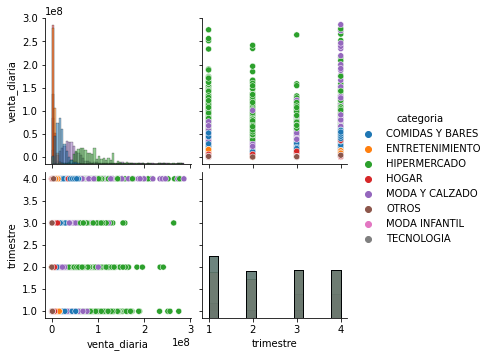

In [15]:
grupos=df.groupby("categoria")
sns.pairplot(df, hue="categoria", vars=["venta_diaria","trimestre"],diag_kind="hist")

En esta gráfica se puede obsevar que mientras en los primeros tres trimestres del año hay una preponderancia de la categoría hipermercado, en el último cuatrimestre la categoría con mayor ventas es moda y calzado, sugiriendo un patrón de compra que se puede deber a las compras de diciembre.
También se nota una reducción en las ventas del tercer trimestre, que puede ser análizada en mayor detalle en un futuro

*ventas vrs mes*

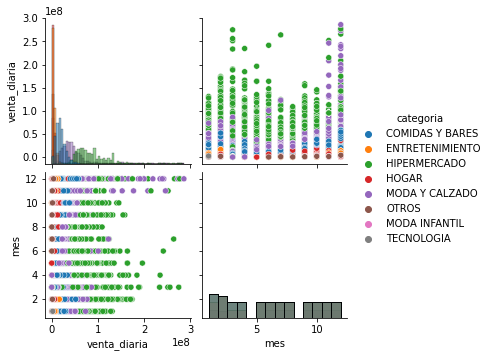

In [16]:
grupos=df.groupby("categoria")
sns.pairplot(df, hue="categoria", vars=["venta_diaria","mes"],diag_kind="hist")

El mismo patron de la gráfica pasada se observa en el comportamiento por mes, donde se observan ventas más altas del sector moda y calzado, en el mes de diciembre, y una reducción en el nivel de ventas para todos los sectores en el més de agosto

*ventas vrs día del mes*

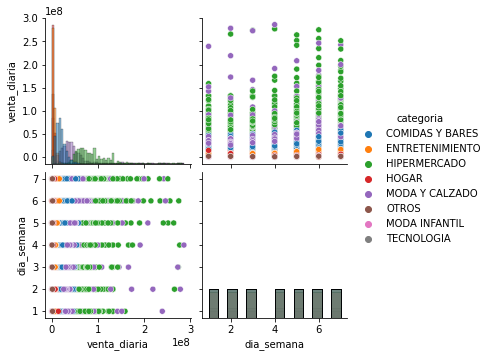

In [17]:
grupos=df.groupby("categoria")
sns.pairplot(df, hue="categoria", vars=["venta_diaria","dia_semana"],diag_kind="hist")

Si se hace el mismo análisis por día de las semana, comenzando en lunes, se ve que hay mayores ventas altas los días sábado y domingo.

Se construyen los boxplot de las ventas agrupadas por las diferenrtes categorias 

---



*boxplot de ventas agrupadas por categorias*

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


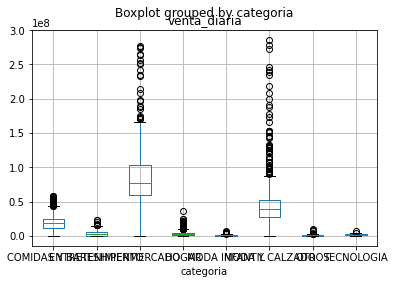

In [18]:
df.boxplot("venta_diaria", "categoria",grid=True)


Se ve que las categorías que presenta una mayor dispersión en cuanto a ventas, nuevamente son hipermercado y moda y calzado, que también presenta en promedios mayores niveles de ventas

*boxplot de ventas agrupado por trimestre*

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


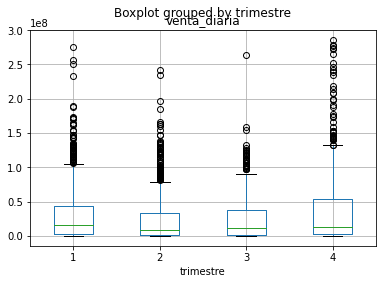

In [19]:
df.boxplot("venta_diaria", "trimestre",grid=True) 

La anterior grafíca muestra que que el trimestre de mayor dispersión es el cuarto, confirmando lo que se vio en la gráfica de dispersión

*boxplot de las ventas agrupadas por el día de la seman*

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


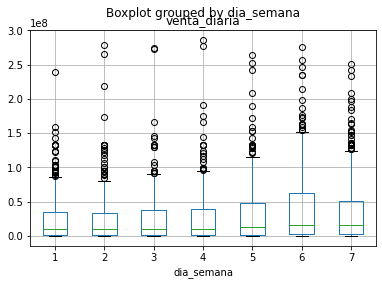

In [20]:
df.boxplot("venta_diaria", "dia_semana", grid=True)

De la anterior gráfica se puede ver que aunque la dispersión de las ventas según el día de la semana es similar, se observa que el sábado tiene un mayor sesgo a los valores altos, representado en un bigote superior más alto.

# **Cración de modelos**

En una primera instancia se realiza una regresión líneal multivariante de las ventas contra la ocupación, el tráfico, el desempleo y la trm. Luego se realiza la estimación de dos series temporales

# *Regresión lineal multivariante*

Lo primero que se realiza es la acotación de los datos que se utilizarán para la regresión

In [21]:
import pandas as pd                    
import statsmodels.api as sm          
import statsmodels.formula.api as smf  
data=pd.concat([df.venta_diaria,df.trafico_dia,df.area_total_ocupada,df.desempleo,df.trm],axis=1)
data.head()

,venta_diaria,trafico_dia,area_total_ocupada,desempleo,trm
0,3.487444e+07,4481.0,721.903,12.795458,3249.75
1,4.204079e+06,4481.0,1883.453,12.795458,3249.75
2,2.318765e+07,4481.0,6225.960,12.795458,3249.75
3,3.491659e+04,4481.0,104.078,12.795458,3249.75
4,9.370870e+06,4481.0,2399.566,12.795458,3249.75


Luego se realiza la regresión por mínimos cuadrados ordinarios, tomando como variable dependeiente el nivel de ventas diario en función del tráfico, el área, el desempleo y el tipo de cambio

In [22]:
regresion = smf.ols("venta_diaria ~ trafico_dia + area_total_ocupada+desempleo+trm", data=df).fit()
print(regresion.summary())

                            OLS Regression Results                            
Dep. Variable:           venta_diaria   R-squared:                       0.616
Model:                            OLS   Adj. R-squared:                  0.616
Method:                 Least Squares   F-statistic:                     1740.
Date:                Fri, 13 Aug 2021   Prob (F-statistic):               0.00
Time:                        00:53:24   Log-Likelihood:                -79949.
No. Observations:                4343   AIC:                         1.599e+05
Df Residuals:                    4338   BIC:                         1.599e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           -6.21e+07   6.99

Como se puede ver los coeficientes son significativos y se podría decir que el modelo explicaría aproximadamente un 60% de la variación de las ventas. Aunque la regresión es significativa en su conjunto, mediante el estadístico F. Es posibile que exista multicolinealidad, dado la relación entre las variables de área y tráfico, por lo que no sean variables explicativas adecuadas.
También es importante anotar que se rechaza la normalidad de los errores en el test de Jarque-Bera

In [23]:
regresion.params

Intercept            -6.210224e+07
trafico_dia           4.935846e+03
area_total_ocupada    1.317081e+04
desempleo             7.124133e+05
trm                   4.507635e+03
dtype: float64

***Pronóstico***

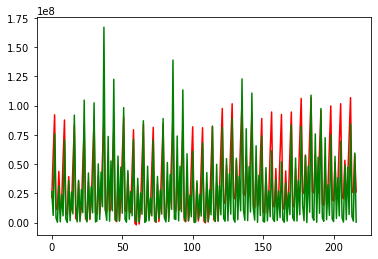

In [24]:
datatest=pd.concat([df2.venta_diaria,df2.trafico_dia,df2.area_total_ocupada,df2.desempleo,df2.trm],axis=1)
yhat=regresion.params[0]+datatest["trafico_dia"]*regresion.params[1]+datatest["area_total_ocupada"]*regresion.params[2]+datatest["desempleo"]*regresion.params[3]+datatest["trm"]*regresion.params[4]
plt.plot(yhat, color="red")
plt.plot(datatest.venta_diaria, color="green")
datatest["yhat"]=regresion.params[0]+datatest["trafico_dia"]*regresion.params[1]



En la anterior gráfica se ven los valores pronosticados con color rojo versus los valores observados en la data de testeo. 

-7481019.61601317


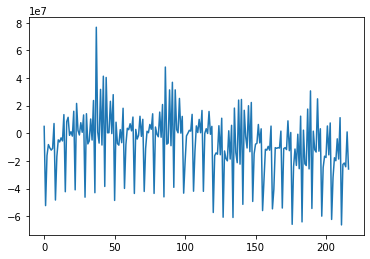

In [25]:
error=datatest.venta_diaria-yhat
error.abs
print(error.mean())
plt.plot(error)

La anterior muestra el comportamiento de los errores de estimación 

# *Modelo Autorregresivo*


Dado las anteriores consideraciones se realiza un modelo autorregresivo, las ventas totales de todas las categorias

In [26]:

venta_diaria=pd.Series(df.venta_diaria)
fecha=pd.Series(df.fecha)
venta=pd.concat([fecha,venta_diaria],axis=1)
venta=venta.groupby(by=fecha).sum()
venta.head()


,venta_diaria
fecha,
2019-01-01,7.167195e+07
2019-01-02,1.630826e+08
2019-01-03,1.623873e+08
2019-01-04,1.754366e+08
2019-01-05,1.954000e+08


Para lo que se crea una serie temporal con la suma de las ventas de todas las categorias para cada día

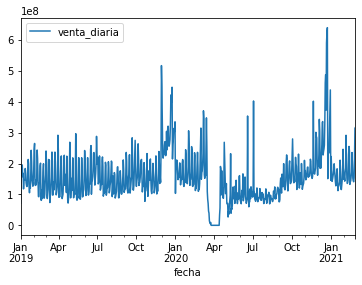

In [27]:
import matplotlib.pyplot as plt
venta.plot()

Test dickey fuller


In [28]:
from statsmodels.tsa.stattools import adfuller
venta_stationarityTest = adfuller(venta['venta_diaria'], autolag='AIC')
print(venta_stationarityTest[1])

0.0007011772052095219


In [ ]:
En el test de dickey fuller muestra que existe estacionalidad

Grafica de autocorrelacion

/usr/local/lib/python3.7/dist-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


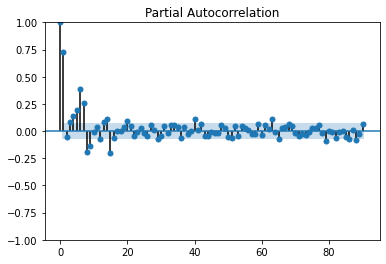

In [29]:
from statsmodels.graphics.tsaplots import plot_pacf
plotAC = plot_pacf(venta['venta_diaria'], lags=90)

En la grafica de autocorrelación se observa que la autocorrelación es significativa aproximadamente hasta un rezago de 20 días

Modelo Autorregresivo con un resago de 20 días

In [30]:
! pip install --upgrade Cython
! pip install --upgrade git+https://github.com/statsmodels/statsmodels
import statsmodels.api as sm
from statsmodels.tsa.ar_model import AutoReg
ar = AutoReg(venta,lags=20).fit()


  Cloning https://github.com/statsmodels/statsmodels to /tmp/pip-req-build-o4cjbaid
  Running command git clone -q https://github.com/statsmodels/statsmodels /tmp/pip-req-build-o4cjbaid
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:537: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


In [31]:
print(ar.summary())

                            AutoReg Model Results                             
Dep. Variable:           venta_diaria   No. Observations:                  790
Model:                    AutoReg(20)   Log Likelihood              -14649.725
Method:               Conditional MLE   S.D. of innovations       44308091.734
Date:                Fri, 13 Aug 2021   AIC                          29343.449
Time:                        00:55:54   BIC                          29445.670
Sample:                    01-21-2019   HQIC                         29382.789
                         - 02-28-2021                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const             1.645e+07   4.92e+06      3.346      0.001    6.81e+06    2.61e+07
venta_diaria.L1      0.5910      0.036     16.451      0.000       0.521       0.661
venta_diaria.L2      0.0496 

La regresión es significativa y posee un mejor criterio de información de Akaike que la regresión por mínimos cuadrados ordinarios

*Pronostico y prueba*

In [32]:
venta_diaria_test=pd.Series(df2.venta_diaria)
fecha_test=pd.Series(df2.fecha)
venta_test=pd.concat([fecha_test,venta_diaria_test],axis=1)
venta_test=venta_test.groupby(by="fecha").sum()
venta_test.head()


,venta_diaria
fecha,
2021-03-27,2.490619e+08
2021-03-28,2.419544e+08
2021-03-29,1.777289e+08
2021-03-30,1.700126e+08
2021-03-31,2.051387e+08


Se crea otra serie temporal para el testeo

fechas de pronostico

In [33]:
f1=len(venta)
f2=len(venta_test)
final=f1+f2

pronostico: se calcula las ventas totales según el modelo de autorregresión

In [37]:
yhat = ar.predict(start=f1,end=final,dynamic=False)
yhat.head()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/deterministic.py:152: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Int64Indexes with a unit increment support extending. The index is set will contain the position relative to the data length.
  UserWarning,


2021-03-01    2.209394e+08
2021-03-02    1.839018e+08
2021-03-03    1.761528e+08
2021-03-04    1.831199e+08
2021-03-05    2.207803e+08
Freq: D, dtype: float64

Pronostico vrs obsrvaciones y errores



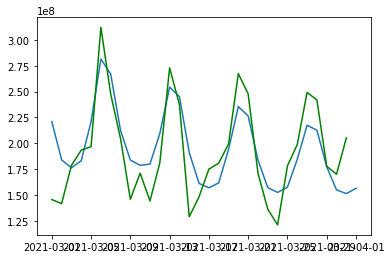

In [38]:

plt.plot(yhat)
plt.plot(venta_test,color="green")


La anterior gráfica muestra el comportamiento de los valores pronosticados en azul versus, los valores observados en el dataset de testeo

-3334919.6579012484


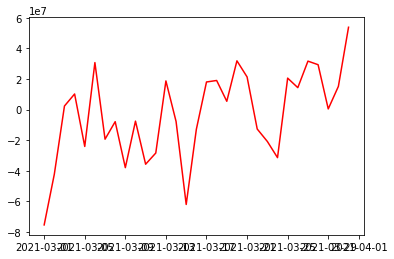

In [39]:
error=venta_test.venta_diaria-yhat
print(error.mean())
plt.plot(error,color="red")

# **Análisis y conclusiones**

Si bien el modelo autorregresivo es mejor para pronosticar las ventas, existen varios factores que pueden ser mejorados, un aspecto es incluir variables dummy por el trimestre y el día de la semana, para saber si existe algún efecto en las quincenas o en los meses en los que se pagan primas.

También sería interesante realizar el pronostico por cada categoría de venta, para entender la dinámica de cada sector, entender que efectos particulares tienen las variables externas como el desempleo y el tipo de cambio.

